In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
left = df[df.left==1]

In [6]:
retained = df[df.left == 0]

In [7]:
left.shape

(3571, 10)

In [8]:
retained.shape

(11428, 10)

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='salary', ylabel='count'>

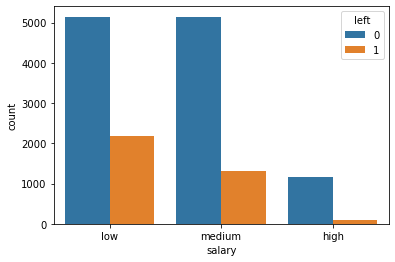

In [20]:
sns.countplot(x=df.salary,hue=df.left)

<IPython.core.display.Javascript object>

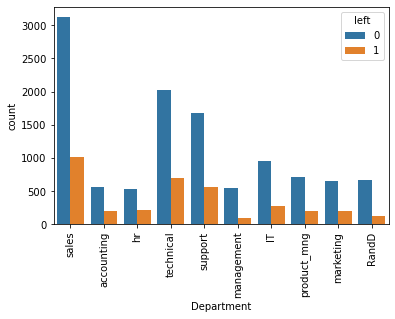

In [25]:
sns.countplot(x=df.Department,hue=df.left)
plt.xticks(rotation = 90);

In [26]:
#independent variables

In [27]:
subdf = df[['satisfaction_level','average_montly_hours','time_spend_company','salary']]

In [28]:
subdf

,satisfaction_level,average_montly_hours,time_spend_company,salary
0,0.38,157,3,low
1,0.80,262,6,medium
2,0.11,272,4,medium
3,0.72,223,5,low
4,0.37,159,3,low
...,...,...,...,...
14994,0.40,151,3,low
14995,0.37,160,3,low
14996,0.37,143,3,low
14997,0.11,280,4,low


In [32]:
salary_dummy = pd.get_dummies(subdf.salary,prefix='salary',drop_first=True)

In [34]:
main_df = pd.concat([subdf,salary_dummy],axis=1)

In [37]:
main_df.drop('salary',axis=1,inplace=True)

In [38]:
main_df

,satisfaction_level,average_montly_hours,time_spend_company,salary_low,salary_medium
0,0.38,157,3,1,0
1,0.80,262,6,0,1
2,0.11,272,4,0,1
3,0.72,223,5,1,0
4,0.37,159,3,1,0
...,...,...,...,...,...
14994,0.40,151,3,1,0
14995,0.37,160,3,1,0
14996,0.37,143,3,1,0
14997,0.11,280,4,1,0


In [40]:
x = main_df

In [41]:
y = df.left

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(x_test,y_test)

LogisticRegression()

In [47]:
model.predict(x_train)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
model.score(x_train,y_train)

0.7687398799885703